In [2]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # 显示所有列
from tqdm.notebook import tqdm
import geopandas as gpd
import transbigdata as tbd
import geoplot as gplt

In [24]:
df1 = pd.read_csv('E:/Data/mobike201803/sample_rate_grid/sample_rate10_rect100.csv')

In [25]:
df1

,poly_id,geometry,road_length,road_density,交通设施服务,住宿服务,体育休闲服务,公共设施,公司企业,医疗保健服务,商务住宅,地名地址信息,摩托车服务,政府机构及社会团体,汽车服务,汽车销售,生活服务,科教文化服务,购物服务,金融保险服务,风景名胜,餐饮服务,generate_trip_num,real_trip_num,poi_num,area,samp_rate,grid_m,poi_density,trip_ratio
0,0,POLYGON ((104.05697836740735 30.56842426052059...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.090227e-04,10,100,0.0,NaN
1,1,POLYGON ((104.05697836740735 30.56842426052059...,0.022785,4.310100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.643209e-03,10,100,0.0,NaN
2,2,POLYGON ((104.05802403215966 30.56842426052058...,0.201868,25.461038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.964255e-03,10,100,0.0,0.0
3,3,POLYGON ((104.05906969691199 30.56842426052059...,0.200893,21.112939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.757586e-03,10,100,0.0,NaN
4,4,POLYGON ((104.0601153616643 30.568424260520597...,0.200603,20.421812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.911477e-03,10,100,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55234,55234,POLYGON ((104.10089628700489 30.78785859459403...,0.102768,11.742868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.375768e-03,10,100,0.0,NaN
55235,55235,POLYGON ((104.10194195175721 30.78785859459403...,0.018706,2.521220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.709712e-03,10,100,0.0,NaN
55236,55236,POLYGON ((104.10298761650954 30.78785859459403...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.809679e-03,10,100,0.0,NaN
55237,55237,POLYGON ((104.10403328126185 30.78785859459404...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.137117e-03,10,100,0.0,NaN


In [22]:
df_all = pd.read_csv('E:/Data/mobike201803/final_data.csv')

In [23]:
df_all

,poly_id,geometry,road_length,road_density,交通设施服务,住宿服务,体育休闲服务,公共设施,公司企业,医疗保健服务,商务住宅,地名地址信息,摩托车服务,政府机构及社会团体,汽车服务,汽车销售,生活服务,科教文化服务,购物服务,金融保险服务,风景名胜,餐饮服务,generate_trip_num,real_trip_num,poi_num,area,samp_rate,grid_m,poi_density,trip_ratio
0,0,POLYGON ((104.05697836740735 30.56842426052059...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000809,10,100,0.000000,NaN
1,1,POLYGON ((104.05697836740735 30.56842426052059...,0.022785,4.310100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002643,10,100,0.000000,NaN
2,2,POLYGON ((104.05802403215966 30.56842426052058...,0.201868,25.461038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.003964,10,100,0.000000,0.0
3,3,POLYGON ((104.05906969691199 30.56842426052059...,0.200893,21.112939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004758,10,100,0.000000,NaN
4,4,POLYGON ((104.0601153616643 30.568424260520597...,0.200603,20.421812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.004911,10,100,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656035,728,POLYGON ((104.08521131572004 30.78246266834631...,4.189859,3.928381,0.0,0.0,1.0,0.0,11.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,5.0,7.0,20.0,0.533281,9,900,37.503701,1.4
1656036,729,POLYGON ((104.09462229849096 30.78246266834633...,2.478291,2.225802,1.0,0.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,21.0,0.556719,9,900,37.721024,3.0
1656037,730,POLYGON ((104.10403328126185 30.78246266834632...,3.908595,3.425588,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,3.0,9.0,0.570500,9,900,15.775641,1.5
1656038,731,POLYGON ((104.11344426403276 30.78246266834633...,1.763052,2.205304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.399730,9,900,2.501690,inf


In [4]:
grid_m_list = np.append((np.linspace(100,900,9)),\
          np.linspace(1000,5000,9)) # 生成网格大小列表


res_df = []

for sample_rate in range(2,21):
    for grid_m in grid_m_list:

        df = df_all[(df_all['samp_rate']==sample_rate) & (df_all['grid_m']==grid_m)]
        # 计算线性回归的系数
        X = df.loc[:, 'generate_trip_num']
        X = sm.add_constant(X) 
        y = df.loc[:, 'real_trip_num']
        model = sm.OLS(y, X,hasconst=True).fit()
        # 保存结果
        res_df.append([sample_rate,grid_m,model.params[1],model.params[0]]) # 分别为采样率、网格大小、斜率、截距


In [5]:
df = pd.DataFrame(res_df,columns=['sample_rate','grid_m','slope','intercept'])

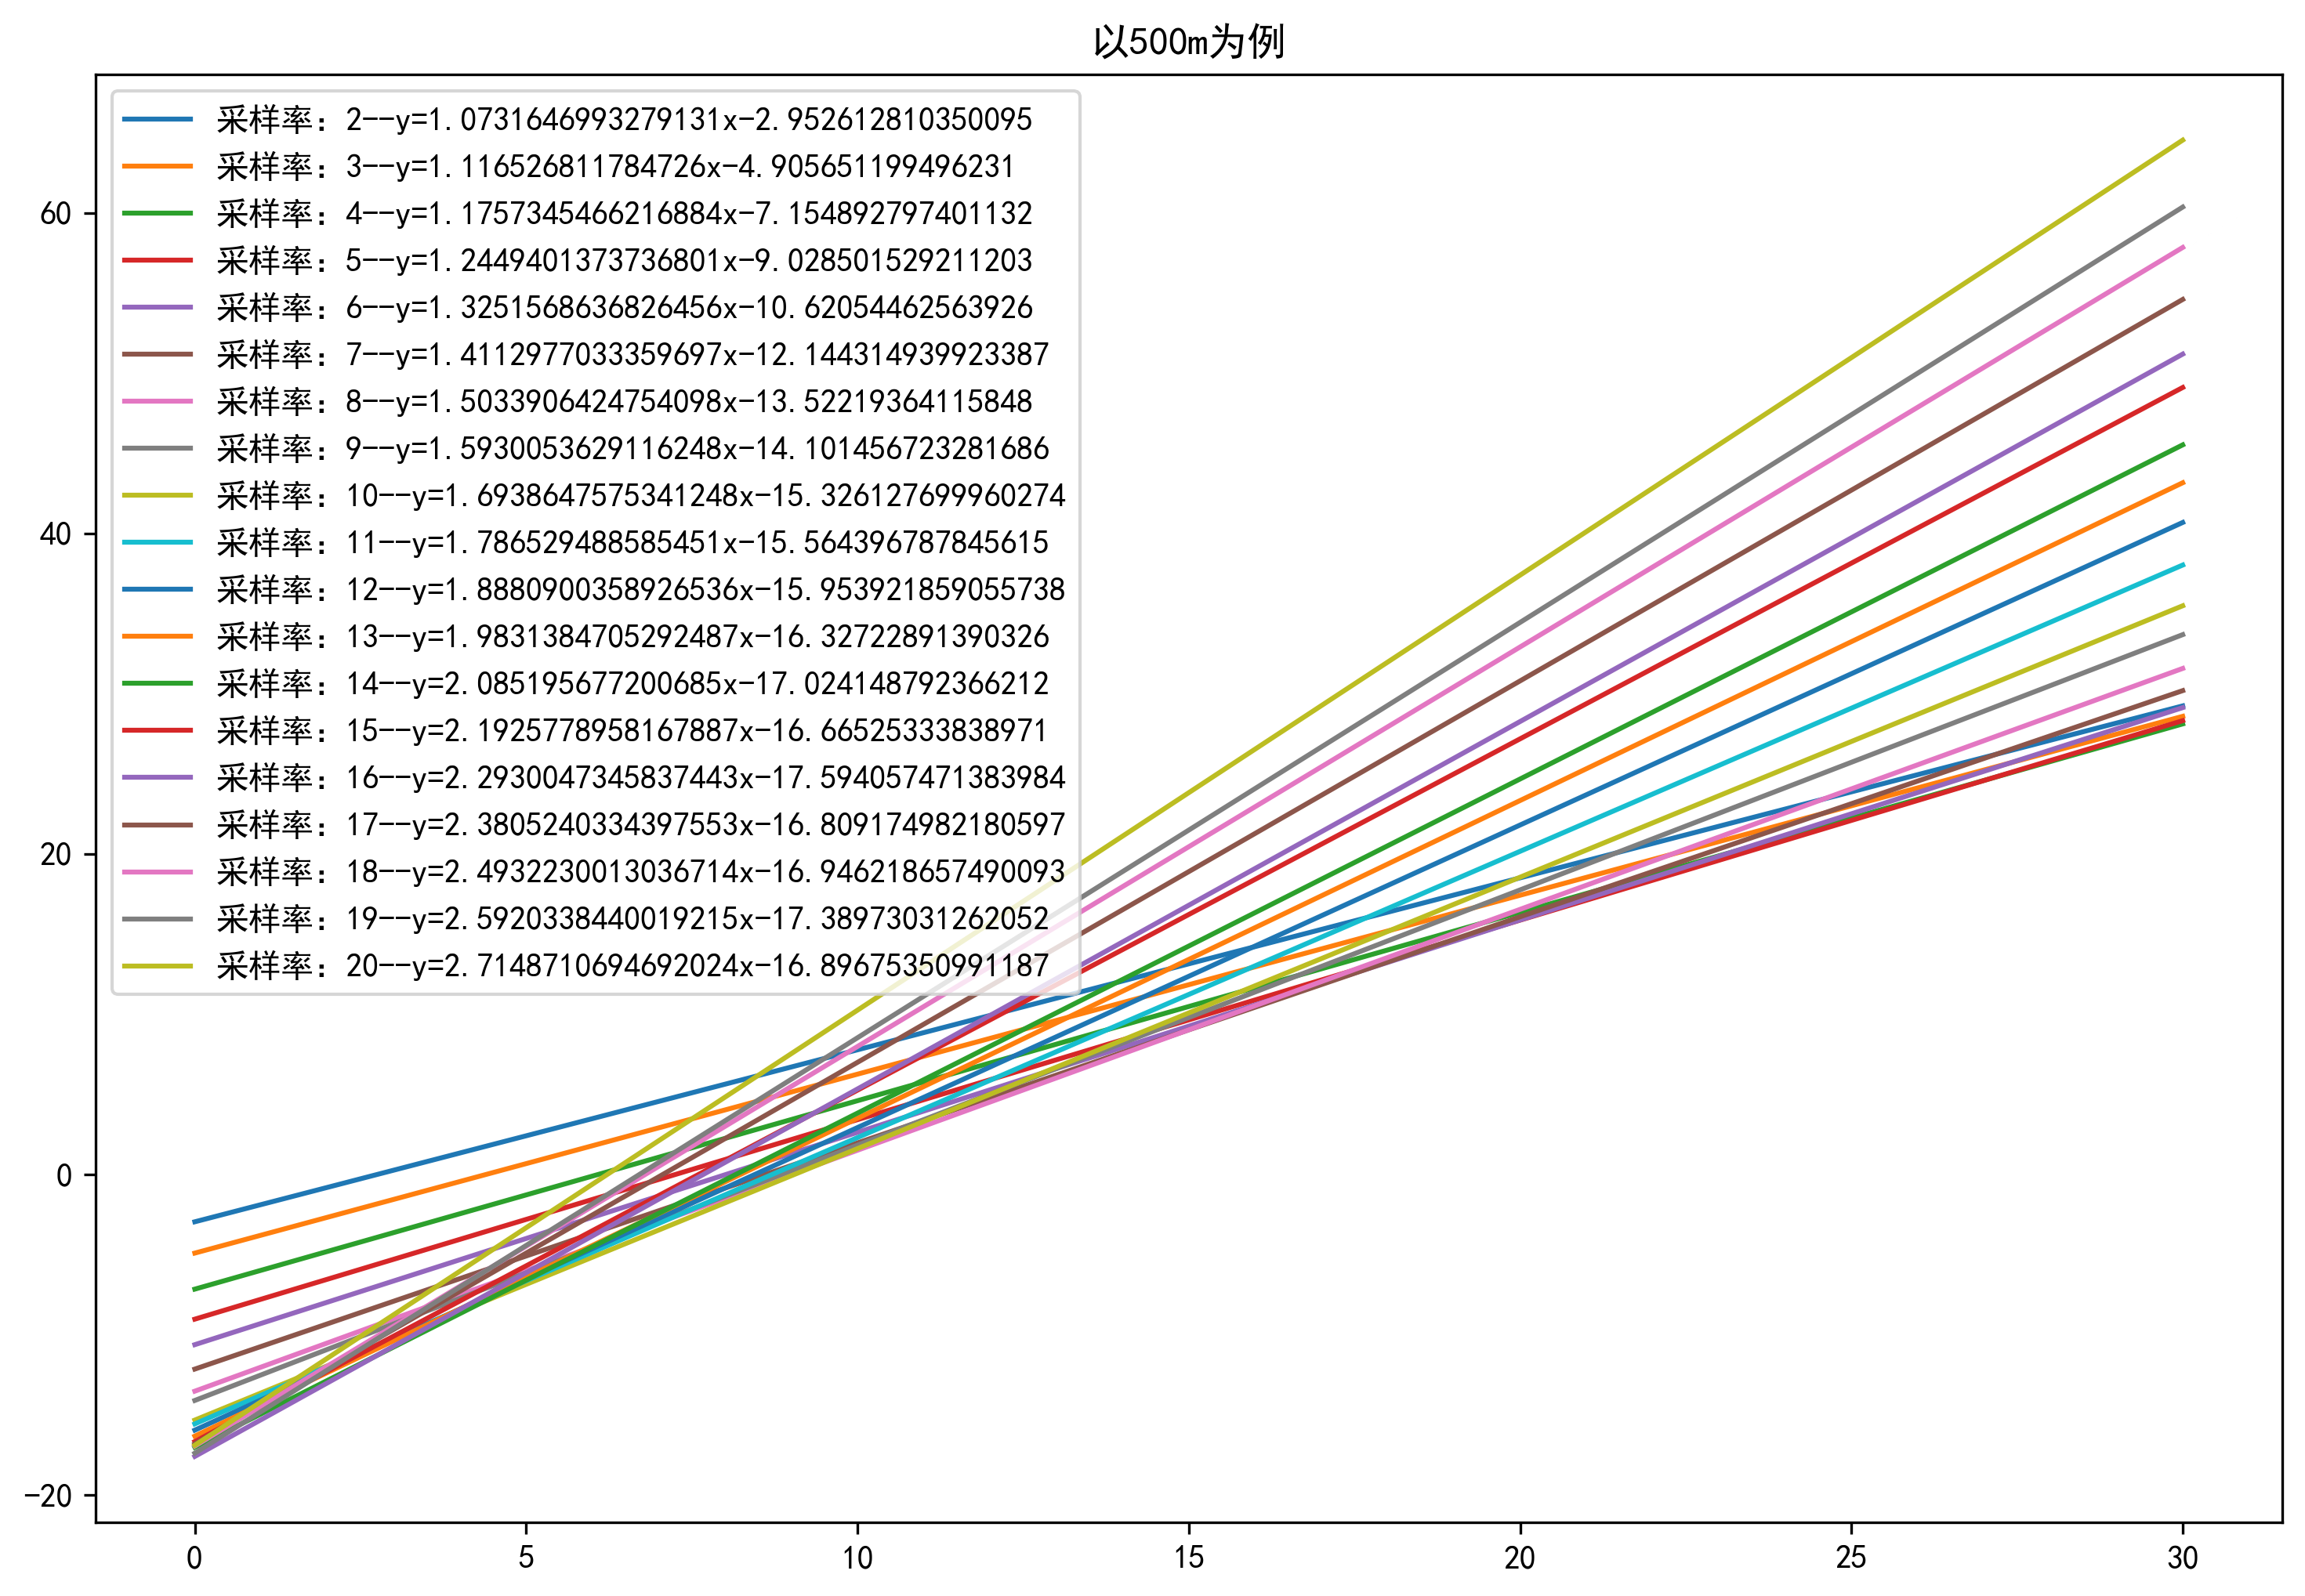

In [21]:
# 以网格尺寸500为例，绘制采样率与斜率的关系图
df500 = df[df['grid_m']==500]
fig, ax = plt.subplots(1,1,figsize=(12, 8)) # 可使用GridSpec用法
for i in range(df500.shape[0]):
    sample_rate = df500.iloc[i,0]
    slope = df500.iloc[i,2]
    intercept = df500.iloc[i,3]
    # 绘制直线
    x = np.linspace(0,30,100)
    y = slope*x + intercept
    if intercept>0:
        ax.plot(x,y,label='采样率：{}--y={}x+{}'.format(str(sample_rate),slope,intercept) )
    else:
        ax.plot(x,y,label='采样率：{}--y={}x{}'.format(str(sample_rate),slope,intercept) )
plt.legend()
ax.set_title('以500m为例')
plt.savefig('C:/Users/yongqi/Desktop/以500m为例.jpg',dpi=300)

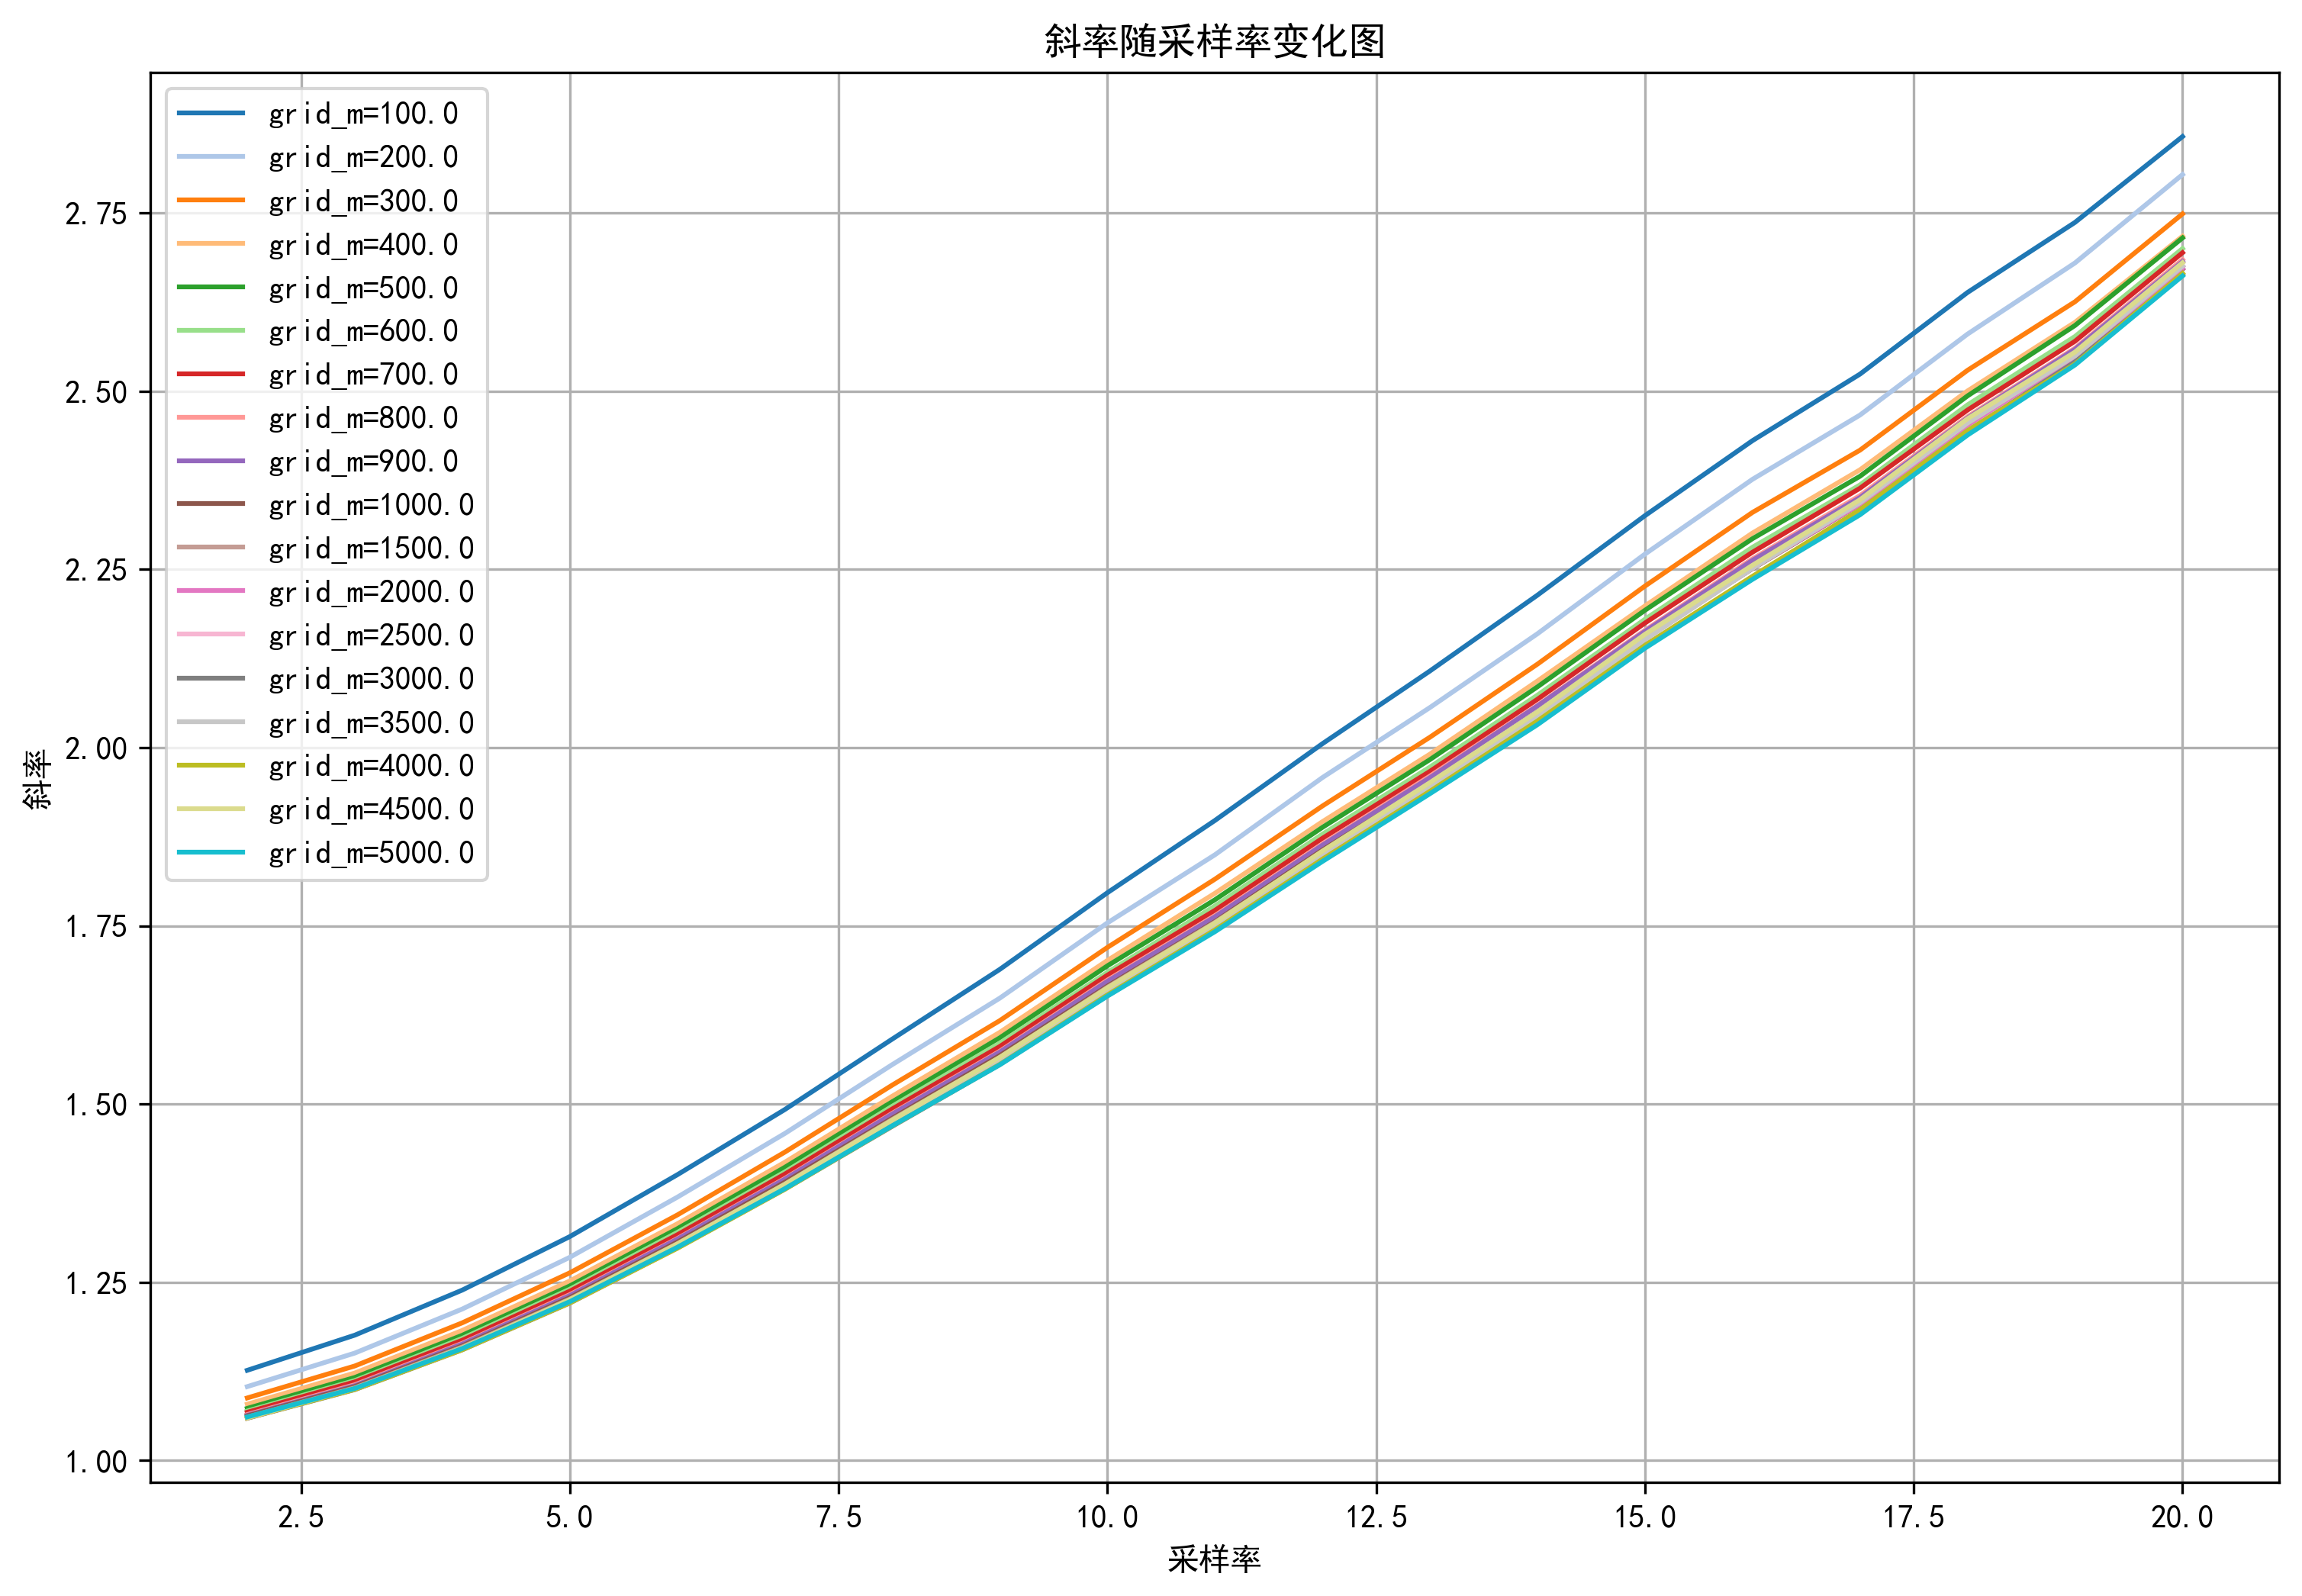

In [23]:
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, 19)]
fig, ax = plt.subplots(1,1,figsize=(12, 8)) # 可使用GridSpec用法
for grid_m,color_grid in zip(df.grid_m.unique(),colors):
    df_temp = df[df['grid_m']==grid_m]

    ax.plot(df_temp['sample_rate'],df_temp['slope'],color=color_grid,label='grid_m={}'.format(grid_m))
    ax.set_xlabel('采样率')
    ax.set_ylabel('斜率')
    ax.legend()
    ax.set_title('斜率随采样率变化图')
    ax.grid(True)
plt.savefig('C:/Users/yongqi/Desktop/斜率随采样率变化图.jpg',dpi=300)

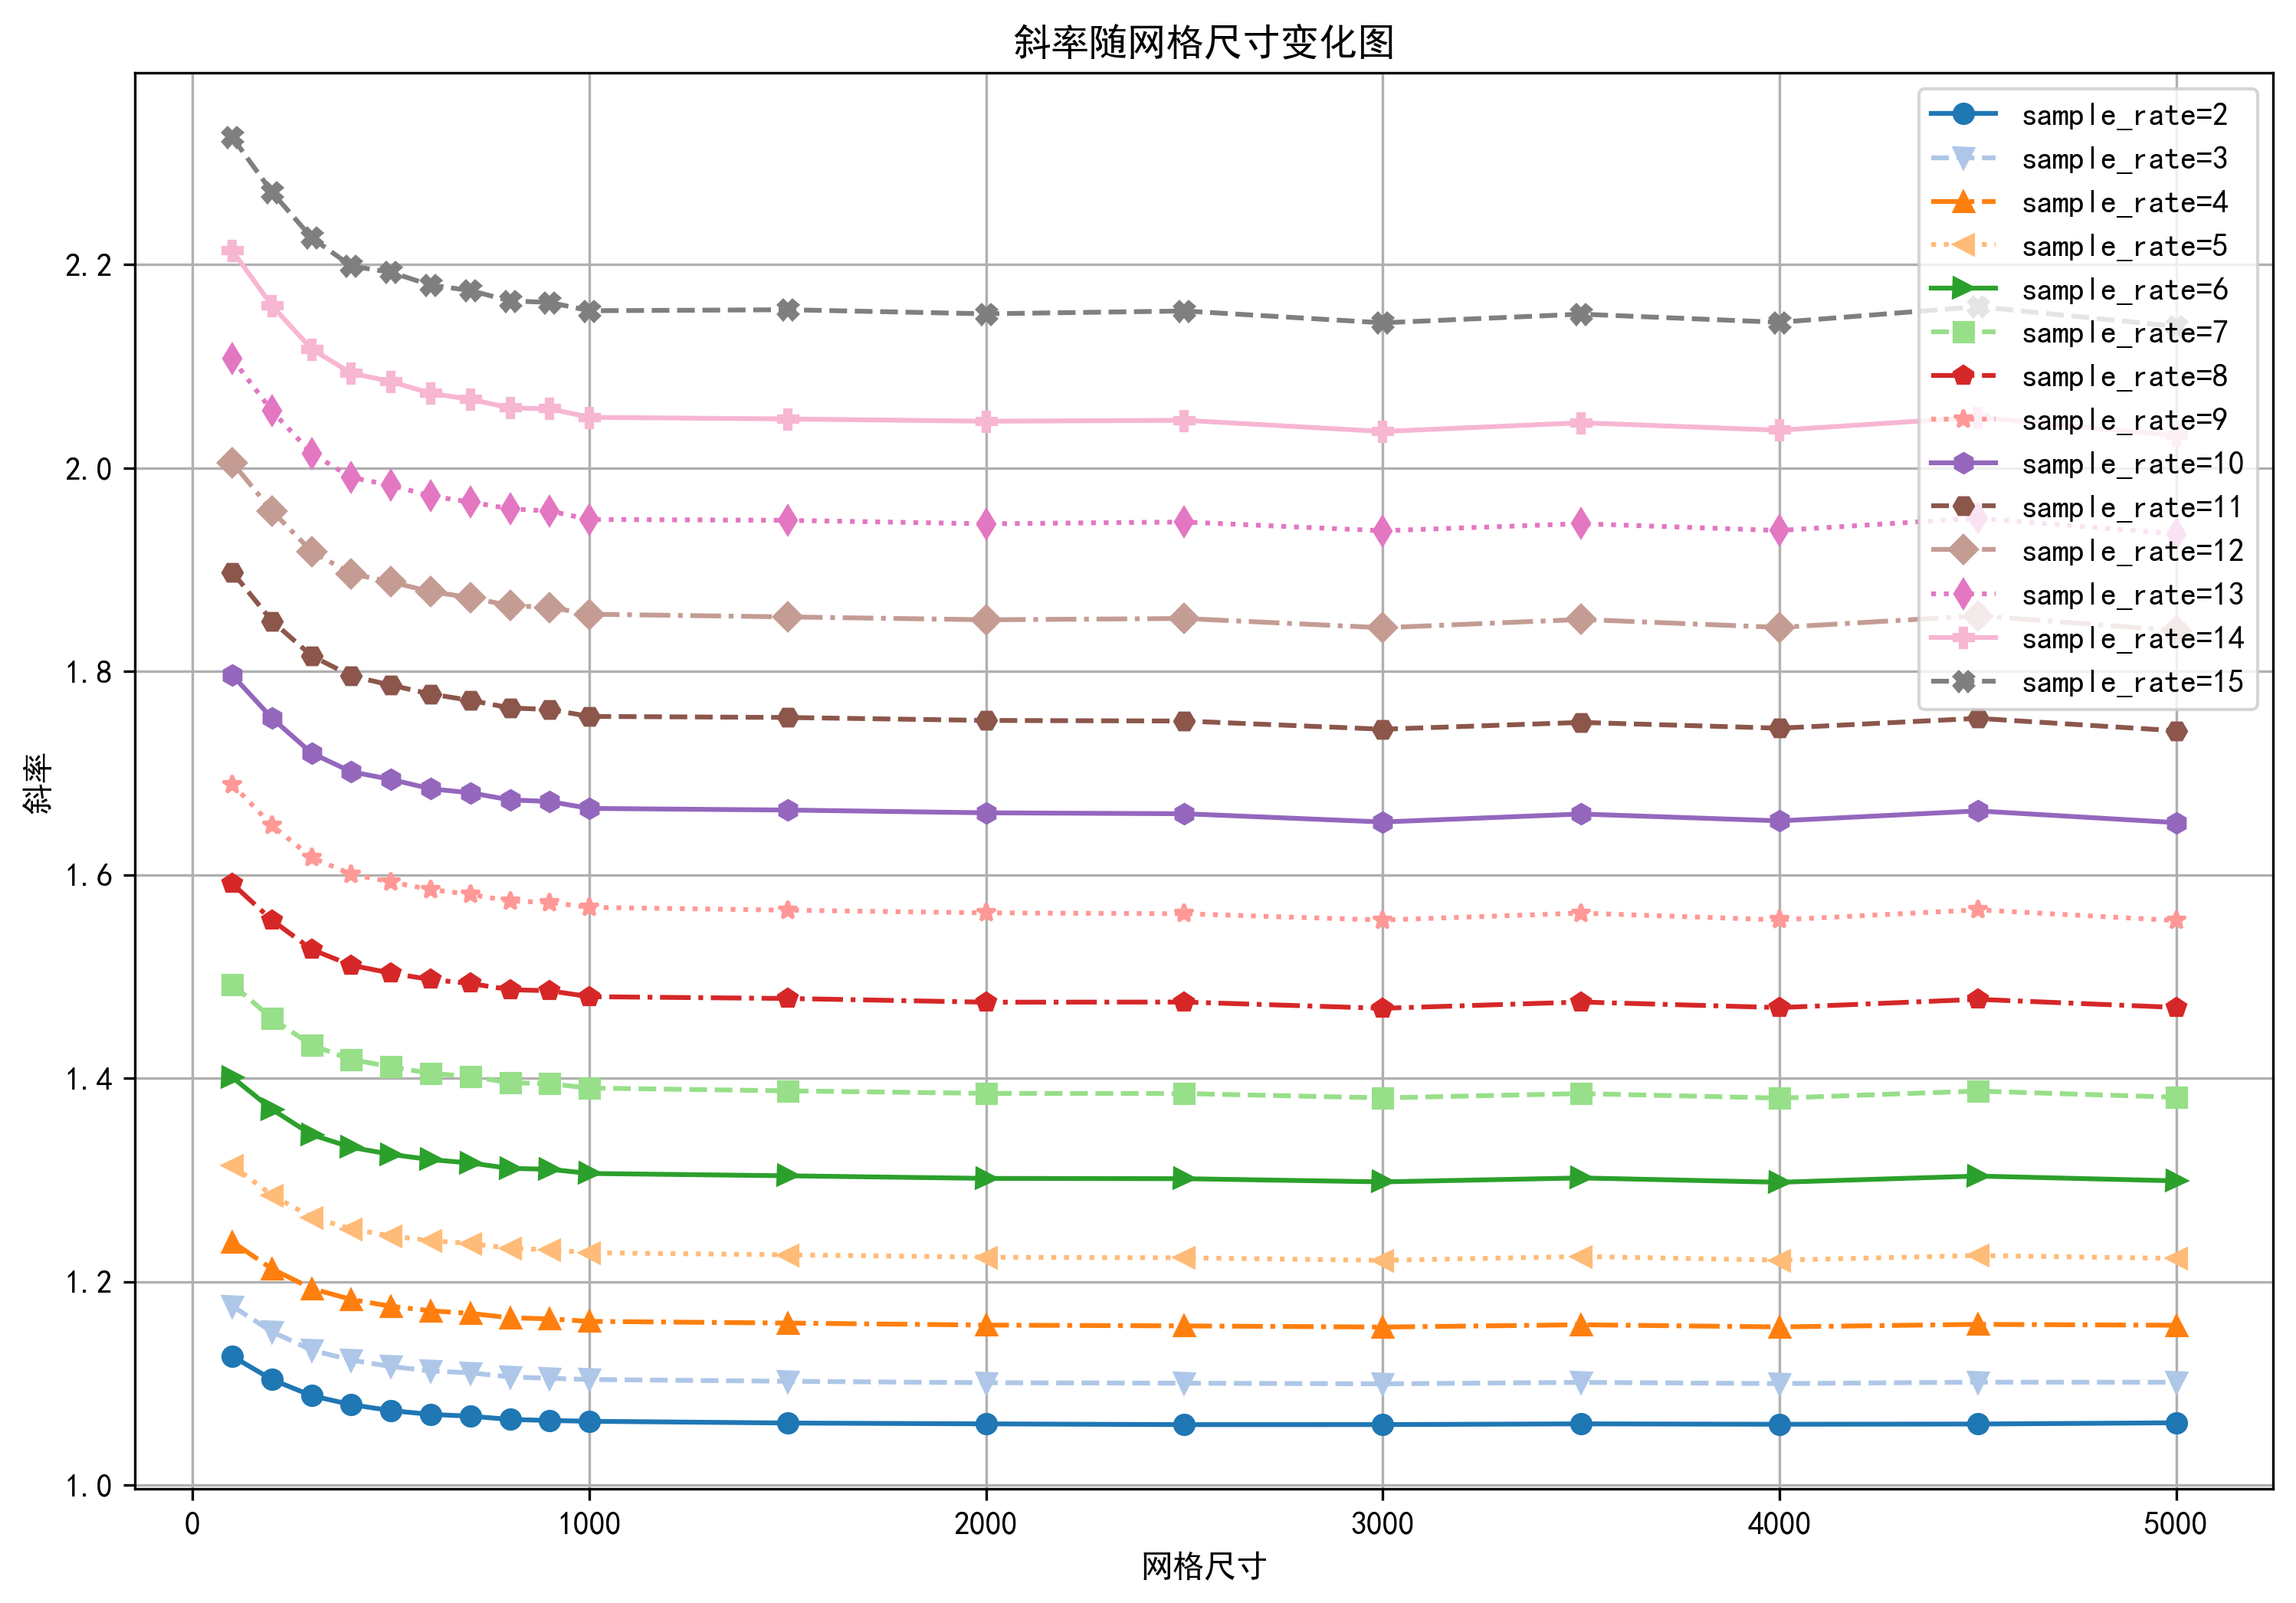

In [33]:
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, 19)]
line_styles = ['-', '--', '-.', ':']
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
fig, ax = plt.subplots(1,1,figsize=(12, 8)) # 可使用GridSpec用法
for sample_rate,color_sample,line_style,marker in zip(df.sample_rate.unique(),colors,line_styles*5,markers):
    df_temp = df[df['sample_rate']==sample_rate]

    ax.plot(df_temp['grid_m'],df_temp['slope'],color=color_sample,marker=marker,linestyle=line_style,label='sample_rate={}'.format(sample_rate))
ax.set_xlabel('网格尺寸')
ax.set_ylabel('斜率')
ax.set_title('斜率随网格尺寸变化图')
ax.grid(True)
# 设置lengend的位置
plt.legend(loc='upper right')
plt.savefig('C:/Users/yongqi/Desktop/斜率随网格尺寸变化图.jpg',dpi=300)

In [10]:
df_temp = df[df['grid_m']==1000]
df_temp

,sample_rate,grid_m,slope,intercept
9,2,1000.0,1.062683,0.231716
27,3,1000.0,1.103766,-5.223899
45,4,1000.0,1.160910,-12.359879
63,5,1000.0,1.228423,-18.679529
81,6,1000.0,1.306382,-23.628450
99,7,1000.0,1.390364,-28.594866
117,8,1000.0,1.480223,-33.109259
135,9,1000.0,1.568078,-35.010722
153,10,1000.0,1.665340,-38.177624
171,11,1000.0,1.755852,-38.669379
